In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly as pl
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
file_path = r"C:\Users\user1\Desktop\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [125]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [58]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [59]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [60]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

# Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?***

***1 Frequency Tables:
    - Generate a frequency table for the product category.***

In [61]:
# Frequency Tables value_counts() or pd.crosstab()

In [132]:
frequency_table = df["category"].value_counts() # freq table 
proportion_table = df["category"].value_counts(normalize=True)*100 #proportion of each unique value
frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         34.221949
 Beauty                                     0.790293
 Handmade Clothing, Shoes & Accessories     0.786896
 Bath & Body                                0.781290
 Birthday Gifts                             0.776625
                                             ...    
 Alexa Built-In Devices                     0.004379
 Motorbike Chassis

In [156]:
# or simpler way

category_frequency = df['category'].value_counts()

category_percentage = df['category'].value_counts(normalize=True) * 100

category_percentage


category
Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
                                            ...    
Alexa Built-In Devices                     0.004379
Motorbike Chassis                          0.004379
Plugs                                      0.004379
Smart Home Security & Lighting             0.004256
Smart Speakers                             0.002210
Name: proportion, Length: 296, dtype: float64

*The frequency table gives the count of each zoning type, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories.*

***- Which are the top 5 most listed product categories?***

In [65]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

In [66]:
## Extracting columns with object (typically string) data types to create a categorical dataframe
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

In [158]:
top5 = (pd.crosstab(index = df_categorical["category"],
                   columns="count")).sort_values(by='count', ascending=False).head(5)
top5

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [157]:
# or like this 
# frequency table and select the top 5 most listed categories
top_5_categories = df['category'].value_counts().head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

***2 Visualizations:***

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [159]:
# Plotting a bar chart using the values from the frequency table
# top_5_categories = df['category'].value_counts().head(5)
sns.barplot(x=top5.index, y=top5.values, palette="Set3");
plt.xticks(rotation=90)

plt.show()

ValueError: Per-column arrays must each be 1-dimensional

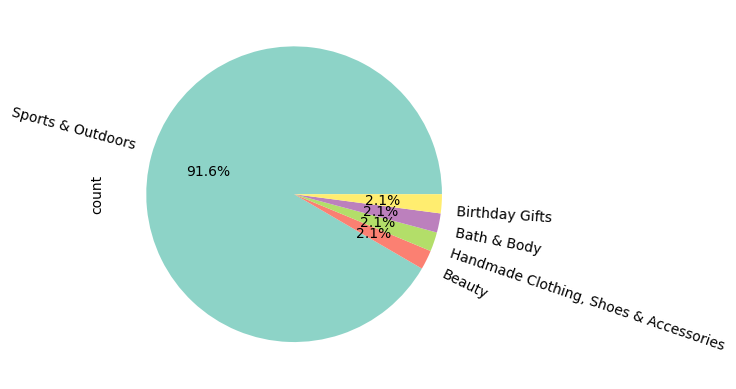

In [129]:
# top_5_categories = df['category'].value_counts().head(5)

top_5_categories.plot.pie(autopct='%1.1f%%', startangle=360, cmap='Set3', rotatelabels=True)
plt.show()

# Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

***1. Measures of Centrality:***
- Calculate the mean, median, and mode for the price of products.

In [134]:
df["price"].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [135]:
df["price"].mean()

89.24380943923663

In [143]:
df["price"].median()

19.09

In [145]:
df["price"].mode()

0    9.99
Name: price, dtype: float64

- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [162]:
average_price = df["price"].mean()
average_price

89.24380943923663

In [163]:
mode_price = df["price"].mode()[0]
mode_price

9.99

In [148]:
df_group_stat = df.groupby(["category"])["price"].sum()
df_group_stat

category
3D Printers                       252472.96
3D Printing & Scanning            406332.34
Abrasive & Finishing Products       3950.44
Action Cameras                    229805.36
Adapters                            2222.55
                                    ...    
Wind Instruments                   97897.62
Window Treatments                   4939.73
Women                             395647.27
Women's Sports & Outdoor Shoes    143657.91
eBook Readers & Accessories        13564.52
Name: price, Length: 296, dtype: float64

***2. Measures of Dispersion:***

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [152]:
variance_price= df["price"].var()
std_dev_price= df["price"].std()
print(f"Variance: {variance_price}",\
      f"Standard Deviation{std_dev_price}")

Variance: 119445.48532256528 Standard Deviation345.60886175352226


In [140]:
interquantile__price = df["price"].quantile([.25, .50, .75])
#interquartile range
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
interquartile_range = Q3 - Q1
print(f"Interquartile Range: {interquartile_range}")

Interquartile Range: 36.0


***3. Visualizations:***
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [149]:
df_group_stat = df.groupby(["category"])["price"].mean().head(20)
df_group_stat

category
3D Printers                          1018.036129
3D Printing & Scanning                 99.909599
Abrasive & Finishing Products          15.801760
Action Cameras                        135.418598
Adapters                                8.750197
Agricultural Equipment & Supplies      22.900714
Alexa Built-In Devices                223.004579
Art & Craft Supplies                   15.049922
Arts & Crafts                           8.182523
Baby                                   18.006239
Baby & Toddler Toys                    18.941322
Bakeware                               14.896569
Ballet & Dancing Footwear              23.846827
Barebone PCs                          365.458874
Basketball Footwear                   115.370657
Bass Guitars & Gear                   106.542557
Bath & Body                            15.042266
Bathroom Furniture                     52.388314
Bathroom Lighting                      30.566969
Bathroom Linen                         20.363621
Name: price

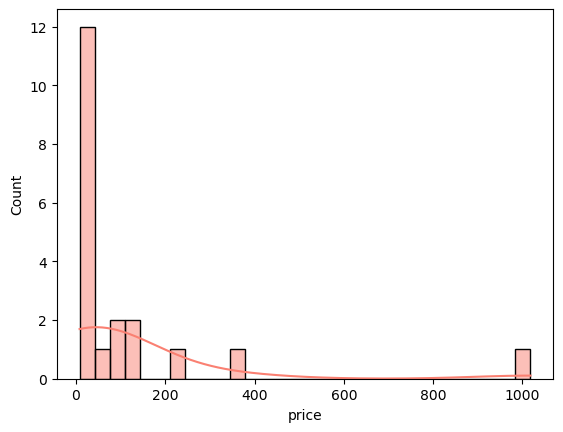

In [167]:
sns.histplot(df_group_stat, kde=True, bins=30, color="salmon")

plt.show()

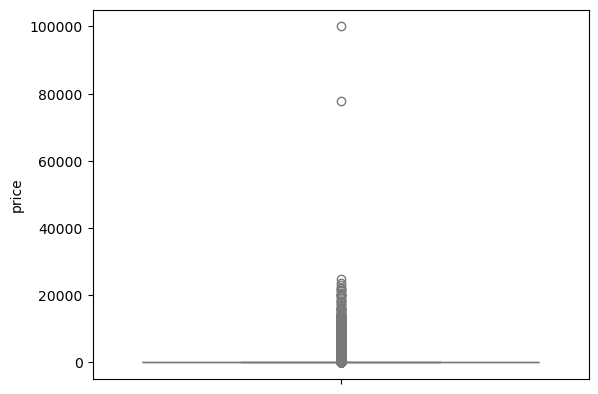

In [169]:
sns.boxplot(data = df['price'], color="lightblue")
plt.show()

# Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

***1. Measures of Centrality:***
- Calculate the mean, median, and mode for the rating of products.

In [171]:
df["stars"].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [172]:
df["stars"].mean()

2.152836472966065

In [173]:
df["stars"].median()

0.0

In [174]:
df["stars"].mode()

0    0.0
Name: stars, dtype: float64

- How do customers generally rate products? Is there a common trend?

In [175]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]
std_deviation = df['stars'].std()
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr = q3 - q1

***2. Measures of Dispersion:***
- Determine the variance, standard deviation, and interquartile range for product rating.\

In [109]:
variance_rating= df["stars"].var()
std_dev_rating= df["stars"].std()
print(f"Variance: {variance_rating}",\
      f"Standard Deviation{std_dev_rating}")

Variance: 4.81743402976196 Standard Deviation2.1948653785054697


In [101]:
interquantile_rating = df["stars"].quantile([.25, .50, .75])
#interquartile range
Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
interquartile_range = Q3 - Q1
print(f"Interquartile Range: {interquartile_range}")

Interquartile Range: 4.4


- Are the ratings consistent, or is there a wide variation in customer feedback?

In [112]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [ ]:
df["stars"].

***3. Shape of the Distribution:***
- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [111]:
skewness_rating = df["stars"].skew()
kurtosis_rating = df["stars"].kurtosis()
skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

In [114]:
kurtosis_rating # they lean lower

-1.9260061280432985

In [116]:
df["stars"].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

***4. Visualizations:***
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

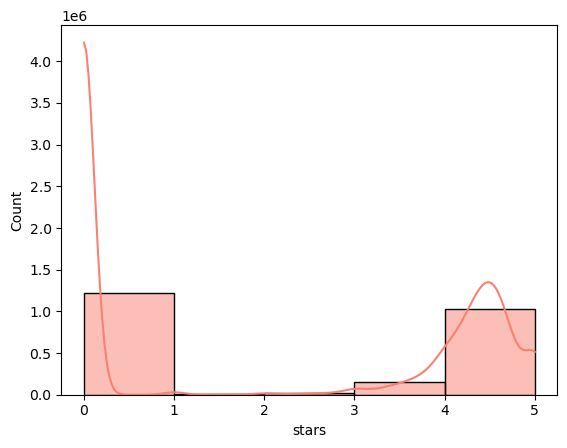

In [113]:
sns.histplot(df["stars"], kde=True, bins=5, color="salmon")
plt.show()